# Analyse des temps de parole (Work in progress)

In [74]:
#import bibliotheque de fonction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fonction.perso_stats as perso_stats

In [75]:
#import donnée
eu2024 = pd.read_csv('donnee_contruite/temps_paroles_EU2024.csv')

Vue générale :<br>
20 % des interventions sur toute les chaines font 80% des temps de paroles.<br>
Il y a un indice de gini de 0.83 ce qui correspond à une grande inégalité du temps de paroles<br>

indice de gini general : 0.8302922613321804


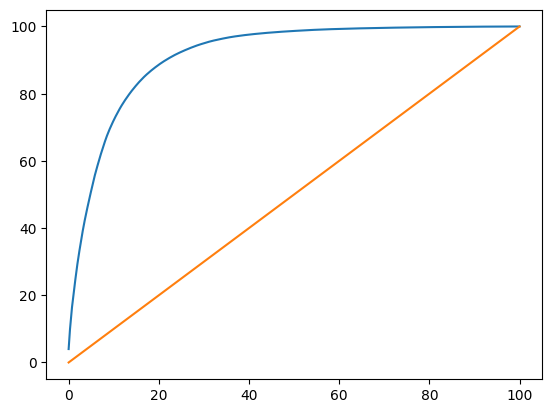

In [76]:
fig,ax =plt.subplots()
print('indice de gini general :',perso_stats.courbe_Lorentz(plt_ax=ax,df=eu2024,colonne='Durée en seconde'))


In [77]:
liste_media = list(eu2024['Nom du media'].unique())
liste_type_media = list(eu2024['Type de media'].unique())

indice de gini TV info continue: 0.8266904732555845
indice de gini TV généraliste: 0.7894672907011306
indice de gini radio: 0.8271722820710588


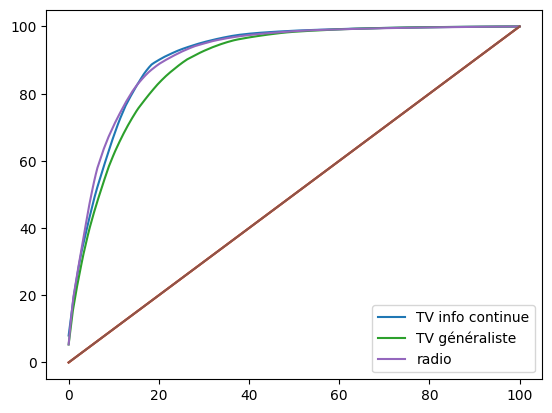

In [78]:
fig,ax =plt.subplots()
for type in liste_type_media:
    data=eu2024[eu2024['Type de media']==type]
    print('indice de gini '+type+':',perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=type))
    ax.legend()


Les radios fournissent en général plus d'égalité du temps de parole.<br>
Enfin juste un peu<br>

In [79]:
liste_media

['BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_']

RMC decouverte et BFM business n ont pas de temps de paroles, division par 0 je dois les enlever

indice de gini BFMTV: 0.8711452570833044
indice de gini C8: 0.7967867267033675
indice de gini Cnews: 0.8567486131868908
indice de gini Euronews: 0.8321788413098234
indice de gini Europe1: 0.8660354752220988
indice de gini France2: 0.8260348111183426
indice de gini France24: 0.8506471760352299
indice de gini France3: 0.5538054178830878
indice de gini France5: 0.9088494130567054
indice de gini FranceCulture: 0.8587416791166826
indice de gini FranceInfo: 0.8692564265289453
indice de gini FranceInter: 0.8457064492841444
indice de gini LCI: 0.8989188788922206
indice de gini M6: 0.669115646258503
indice de gini RFI: 0.7693794178970383
indice de gini RMC-Story: 0.7886156975352951
indice de gini RMC: 0.8649782535386632
indice de gini RTL: 0.8696766803894352
indice de gini RadioClassique: 0.7011580594679184
indice de gini SudRadio: 0.7802769086690928
indice de gini TF1: 0.7835045798486658
indice de gini TMC: 0.8022759601706967
indice de gini TV5Monde: 0.7788386071233421
indice de gini franceinf

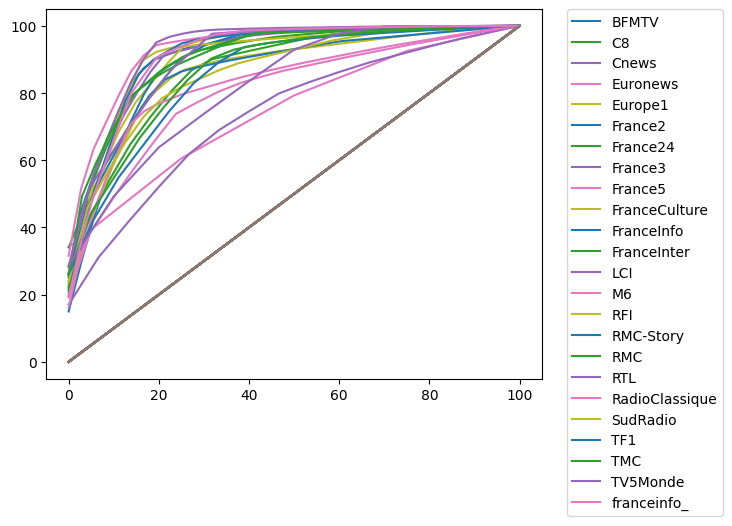

In [80]:
fig,ax =plt.subplots()
liste_media=[#'BFMBusiness',
 'BFMTV',
 'C8',
 'Cnews',
 'Euronews',
 'Europe1',
 'France2',
 'France24',
 'France3',
 'France5',
 'FranceCulture',
 'FranceInfo',
 'FranceInter',
 'LCI',
 'M6',
 'RFI',
 'RMC-Story',
 'RMC',
 #'RMCDecouverte',
 'RTL',
 'RadioClassique',
 'SudRadio',
 'TF1',
 'TMC',
 'TV5Monde',
 'franceinfo_'
 ]
 
dico_gini_media = {}
for media in liste_media:
    data=eu2024[eu2024['Nom du media']==media]
    indice = perso_stats.courbe_Lorentz(plt_ax=ax,df=data,colonne='Durée en seconde',label=media)
    print('indice de gini '+media+':',indice)
    dico_gini_media[media] = float(indice)
    ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

# Classement des medias du moins égalitaire au plus égalitaire selon l indice de Gini :

In [81]:
for key in sorted(dico_gini_media, key = dico_gini_media.get, reverse=True) :
    print (key,':', dico_gini_media[key])

France5 : 0.9088494130567054
LCI : 0.8989188788922206
BFMTV : 0.8711452570833044
RTL : 0.8696766803894352
FranceInfo : 0.8692564265289453
Europe1 : 0.8660354752220988
RMC : 0.8649782535386632
franceinfo_ : 0.862918658270318
FranceCulture : 0.8587416791166826
Cnews : 0.8567486131868908
France24 : 0.8506471760352299
FranceInter : 0.8457064492841444
Euronews : 0.8321788413098234
France2 : 0.8260348111183426
TMC : 0.8022759601706967
C8 : 0.7967867267033675
RMC-Story : 0.7886156975352951
TF1 : 0.7835045798486658
SudRadio : 0.7802769086690928
TV5Monde : 0.7788386071233421
RFI : 0.7693794178970383
RadioClassique : 0.7011580594679184
M6 : 0.669115646258503
France3 : 0.5538054178830878


Cette liste est concu avec une regle : chaque liste doit avoir le meme temps de parole. Ainsi une chaine qui lutte contre les autres en mettant en avant une liste peut representative va donc etre classé non égalitaire.<br>
travail en cours : faire des couleurs pour classé les partie en fonction de leurs couleur politique.<br>
classé les media en fonction de leur preference politique<br>
faire un rendement voie/temps d'antenne pour voir si il y a un influence du temps d'antenne sur les voies<br>


In [82]:
liste_liste = eu2024['Listes candidates'].unique()

In [83]:
len(liste_liste)

39